In [52]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ptk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB       
from sklearn import metrics

from textblob import TextBlob

sns.set(style="whitegrid")
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 18
plt.style.use("fivethirtyeight")
sns.set(style="whitegrid")

In [53]:
df = pd.read_csv('./original_tweets_corpes.csv')
df['tweet_dates']= pd.to_datetime(df['tweet_dates'], errors = 'coerce')

In [54]:
df.sample(n=6)

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates
36621,Twitter Web Client,The #CelebrityApprentice Sunday night on NBC a...,32.0,8.0,False,2012-04-06 14:24:08
8771,Twitter for Android,We have all got to come together and win this ...,19038.0,48403.0,False,2016-10-17 12:35:45
12976,Twitter for iPhone,To show you how politicians act Bobby Jindal s...,1203.0,3139.0,False,2015-11-21 14:35:20
16198,Instagram,Standing ovation after promising to bring the ...,40.0,92.0,False,2015-06-04 22:44:17
15351,Twitter Web Client,"CNN: ""New GOP polls show Trump's favorability ...",304.0,722.0,False,2015-07-16 20:28:53
22864,Twitter Web Client,"via American Spectator @AmSpec ""Trump Card"" b...",12.0,15.0,False,2014-07-03 15:02:04


In [55]:
df["favorite_count"].describe()

count     38189.000000
mean      21616.210008
std       41552.669856
min           0.000000
25%          27.000000
50%         180.000000
75%       19848.000000
max      879647.000000
Name: favorite_count, dtype: float64

In [56]:
annual_median = df.groupby(by=df["tweet_dates"].dt.year)["favorite_count"].median()
df["fave_count_adj"] = df["favorite_count"] / annual_median[df["tweet_dates"].dt.year.values].values

In [57]:
df["fave_count_adj"].describe()

count    38189.000000
mean         4.157976
std         45.873473
min          0.000000
25%          0.489796
50%          1.000000
75%          2.222222
max       3813.115385
Name: fave_count_adj, dtype: float64

Text(0.5, 1.0, 'testing the possible bin sizes')

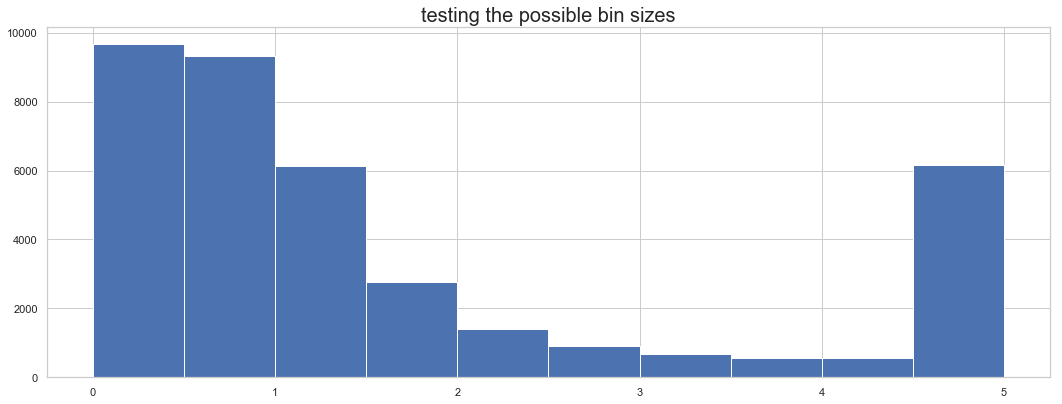

In [58]:
df['fave_count_adj'].clip(upper=5.0).hist()
plt.title('testing the possible bin sizes', fontsize = 20)

In [59]:
cuts = [-1, 1, 5, np.inf]
engage_category = ['low', 'med', 'high']
df['engagement'] = pd.cut(df['fave_count_adj'].values, bins = cuts, labels = engage_category)

In [60]:
df['engagement'].value_counts()

low     19219
med     13268
high     5702
Name: engagement, dtype: int64

In [61]:
low_class = 19115

## Naive Bayes Classification Model

In [62]:
X = df['text']
y = df['engagement']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
NB_CV_accuracy = metrics.accuracy_score(y_test, y_pred_class)
X_train_dtm.shape

(28641, 29629)

In [64]:
print("Baseline accuracy is {}%".format((low_class / 37980) * 100))
print("Using NB model accuracy is {}%".format(NB_CV_accuracy * 100))

Baseline accuracy is 50.3291205897841%
Using NB model accuracy is 61.19606200251362%


In [65]:
#Using TfidVectorizer() which normalizes the matrix values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect_TFID = TfidfVectorizer(lowercase = True)
X_train_dtm = vect_TFID.fit_transform(X_train)
X_test_dtm = vect_TFID.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
NB_TFI_accuracy = metrics.accuracy_score(y_test, y_pred_class)
X_train_dtm.shape

(28641, 29629)

In [66]:
print("Baseline accuracy is {}%".format((low_class / 37980) * 100))
print("Using NB model accuracy is {}%".format(NB_CV_accuracy * 100))
print("Using NB model using the TfidVectorizer accuracy is {}%".format(NB_TFI_accuracy * 100))

Baseline accuracy is 50.3291205897841%
Using NB model accuracy is 61.19606200251362%
Using NB model using the TfidVectorizer accuracy is 59.530791788856305%


## Modifying the parameters of countvectorizer
I printed the number of features each X_train_dtm collects everytime I change a parameter of CountVectorizer() to show a corrolation between higher number of features and accuracy 
## stop_words


In [67]:
#string {‘english’}
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True, stop_words = 'english')
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_class)*100)
X_train_dtm.shape

Accuracy:  61.70925848345203


(28641, 29337)

## min_df + stop_words

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True, stop_words = 'english', min_df = 2)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_class)*100)
X_train_dtm.shape

Accuracy:  62.107247591118565


(28641, 12694)

## min_df alone doesn't improve performance

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True, min_df = 2)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_class)*100)
X_train_dtm.shape

Accuracy:  61.61499790532049


(28641, 12977)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True, min_df = 4)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_class)*100)
X_train_dtm.shape

Accuracy:  61.05990783410138


(28641, 7444)

## ngram_range

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True, ngram_range=(1,2))
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_class)*100)
X_train_dtm.shape

Accuracy:  61.405529953917046


(28641, 234978)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect = CountVectorizer(lowercase = True, ngram_range=(1,3))
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_class)*100)
X_train_dtm.shape

Accuracy:  61.20653540008378


(28641, 594783)

# Sentiment Analysis

In [73]:
#Creating function to apply a library method to series
#-1 is most negative sentiment rank, 1 is the most positive
def detect_sentiment(tweet):
    return TextBlob(tweet).sentiment.polarity

In [74]:
df['sentiment_rank'] = df['text'].apply(detect_sentiment)

In [75]:
df.sample(n=4)

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates,fave_count_adj,engagement,sentiment_rank
31862,Mobile Web (M5),Bret had a target on his back from the get go...,24.0,21.0,False,2013-03-10 23:17:46,1.166667,med,0.000000
10285,Twitter for Android,The Inspector General's report on Crooked Hill...,7819.0,22346.0,False,2016-05-26 13:18:27,1.424128,med,-0.162500
4936,Twitter for iPhone,The U.S. has an increased economic value of mo...,16331.0,73172.0,False,2018-06-05 10:51:07,0.878521,low,0.612500
21445,Twitter for Android,Right now 4000 U.S. troops are stupidly headin...,677.0,545.0,False,2014-10-09 13:17:04,11.122449,high,-0.003571


In [76]:
df['sentiment_rank'].describe()

count    38189.000000
mean         0.184221
std          0.357710
min         -1.000000
25%          0.000000
50%          0.100000
75%          0.400000
max          1.000000
Name: sentiment_rank, dtype: float64

C:\Users\fs4re\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of the sentiment rank')

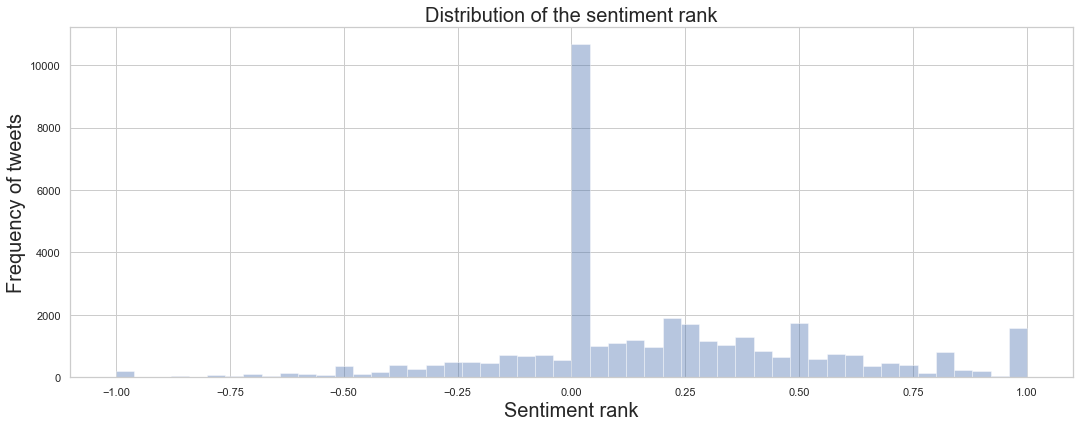

In [77]:
sns.distplot(df['sentiment_rank'], hist = True, kde = False);
plt.xlabel('Sentiment rank',fontsize = 20);
plt.ylabel('Frequency of tweets',fontsize = 20);
plt.title('Distribution of the sentiment rank', fontsize = 20)

In [78]:
#Since the values of sentiment_rank are close to one another and somehow distributed evenly
# I made the cuts based on values -1 to 0, 0 to 0.5, 0.5 to 1
cuts = [-1, 0, 0.5, 1]
senti_category = ['negative', 'neutral', 'positive']
df['sentiment'] = pd.cut(df['sentiment_rank'].values, bins = cuts, labels = senti_category)

Text(0.5, 0, 'Sentiment categories')

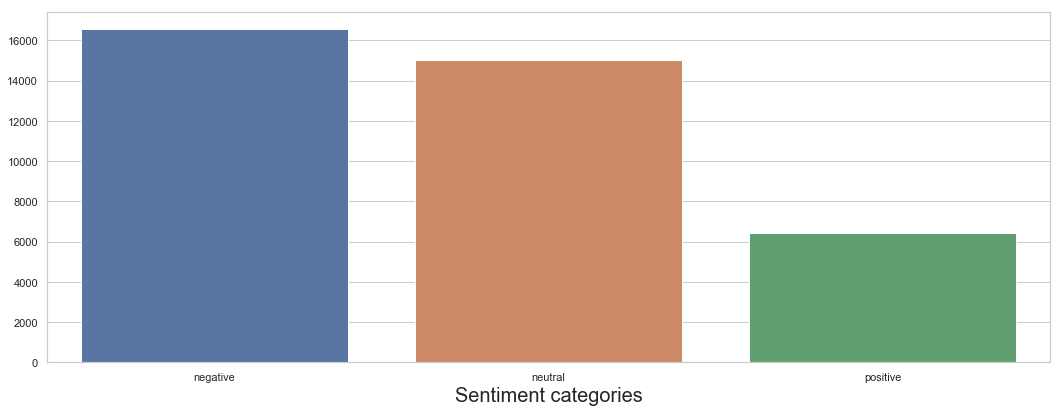

In [79]:
sns.barplot(x = df['sentiment'].value_counts().index, y = df['sentiment'].value_counts().values)
plt.xlabel('Sentiment categories', fontsize = 20)

In [80]:
g = df.groupby(by = df["tweet_dates"].dt.year)['sentiment']
nine = g.get_group(2019)

TypeError: can only concatenate str (not "float") to str

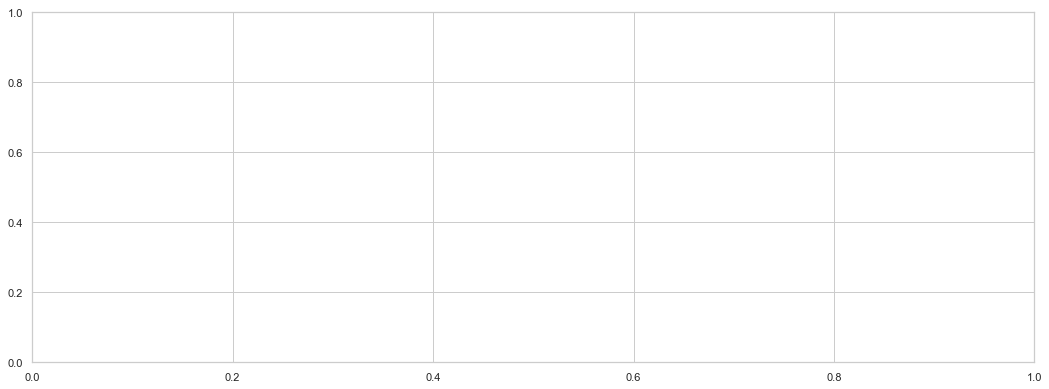

In [81]:
sns.distplot(nine, hist = True)

In [86]:
#A function that can detect how popular a work or phrase is in the tweets 
def catch_phrase_finder(tweet):
    blob = TextBlob(tweet)
    return blob.words.count('Russia')

In [85]:
loser = df['text'].apply(catch_phrase_finder)
df[loser.values > 0].shape

(122, 10)

In [83]:
sad = df['text'].apply(catch_phrase_finder)
df[sad.values > 0].shape

(272, 10)

In [87]:
Russia = df['text'].apply(catch_phrase_finder)
df[Russia.values > 0].shape

(305, 10)